In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [36]:
data = sns.load_dataset('mpg')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [37]:
data = data.dropna()
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [38]:
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'origin']
x = data[features]
y = data['mpg']
x.head()

,cylinders,displacement,horsepower,weight,acceleration,origin
0,8,307.0,130.0,3504,12.0,usa
1,8,350.0,165.0,3693,11.5,usa
2,8,318.0,150.0,3436,11.0,usa
3,8,304.0,150.0,3433,12.0,usa
4,8,302.0,140.0,3449,10.5,usa


In [39]:
x_encoded = pd.get_dummies(x,columns=['origin'],drop_first=True)
x_encoded.head()

,cylinders,displacement,horsepower,weight,acceleration,origin_japan,origin_usa
0,8,307.0,130.0,3504,12.0,False,True
1,8,350.0,165.0,3693,11.5,False,True
2,8,318.0,150.0,3436,11.0,False,True
3,8,304.0,150.0,3433,12.0,False,True
4,8,302.0,140.0,3449,10.5,False,True


In [40]:
xtrain,xtest,ytrain,ytest = train_test_split(x_encoded,y,test_size=0.2,random_state=42)

In [41]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
y_pred = lr.predict(xtest)

In [42]:
mae = mean_absolute_error(ytest,y_pred)
mse = mean_squared_error(ytest,y_pred)
rmse = np.sqrt(mean_squared_error(ytest, y_pred))
r2 = r2_score(ytest, y_pred)
adj_r2 = 1 - (1-r2) * (len(ytest)-1)/(len(ytest)-xtest.shape[1]-1)
print(f"\nLinear Model: MAE={mae:.2f}, MSE={mse:.2f}, RMSE={rmse:.2f}, R²={r2:.2f}, Adjusted R²={adj_r2:.2f}")


Linear Model: MAE=3.35, MSE=17.45, RMSE=4.18, R²=0.66, Adjusted R²=0.62


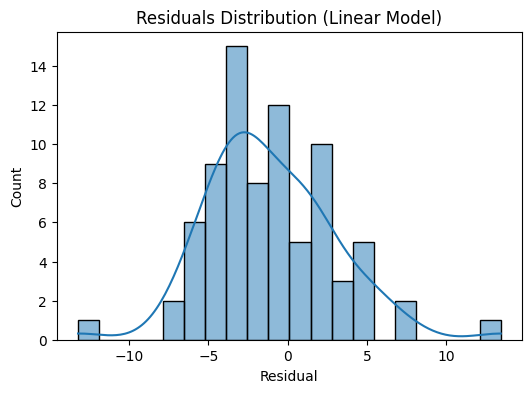

In [43]:
plt.figure(figsize=(6,4))
sns.histplot(ytest - y_pred, bins=20, kde=True)
plt.title('Residuals Distribution (Linear Model)')
plt.xlabel('Residual')
plt.show()

In [45]:
poly = PolynomialFeatures(degree=2,include_bias=False)
xpolytrain = poly.fit_transform(xtrain)
xpolytest = poly.fit_transform(xtest)

lrpoly = LinearRegression()
lrpoly.fit(xpolytrain,ytrain)

ypolypred = lrpoly.predict(xpolytest)

In [46]:
mae_poly = mean_absolute_error(ytest, ypolypred)
mse_poly = mean_squared_error(ytest, ypolypred)
rmse_poly = np.sqrt(mean_squared_error(ytest, ypolypred))
r2_poly = r2_score(ytest, ypolypred)
adj_r2_poly = 1 - (1-r2_poly) * (len(ytest)-1)/(len(ytest)-xpolytest.shape[1]-1)

print(f"\nPolynomial Model: MAE={mae_poly:.2f}, MSE={mse_poly:.2f}, RMSE={rmse_poly:.2f}, R²={r2_poly:.2f}, Adjusted R²={adj_r2_poly:.2f}")


Polynomial Model: MAE=2.95, MSE=16.69, RMSE=4.08, R²=0.67, Adjusted R²=0.41


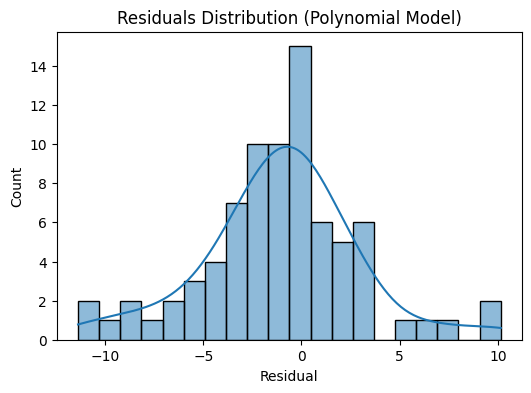

In [47]:
plt.figure(figsize=(6,4))
sns.histplot(ytest - ypolypred, bins=20, kde=True)
plt.title('Residuals Distribution (Polynomial Model)')
plt.xlabel('Residual')
plt.show()

In [51]:
coef_names = poly.get_feature_names_out(x_encoded.columns)
coefs_df = pd.DataFrame({'Feature': coef_names, 'Coef': lrpoly.coef_})


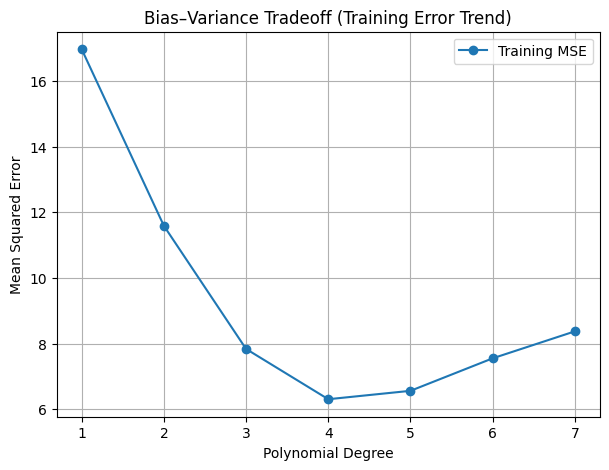

In [52]:
train_errors = []
for d in range(1, 8):
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(x_encoded)
    model = LinearRegression().fit(X_poly, y)
    mse = mean_squared_error(y, model.predict(X_poly))
    train_errors.append(mse)

plt.figure(figsize=(7, 5))
plt.plot(range(1, 8), train_errors, marker='o', label='Training MSE')
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Bias–Variance Tradeoff (Training Error Trend)")
plt.grid(True)
plt.legend()
plt.show()

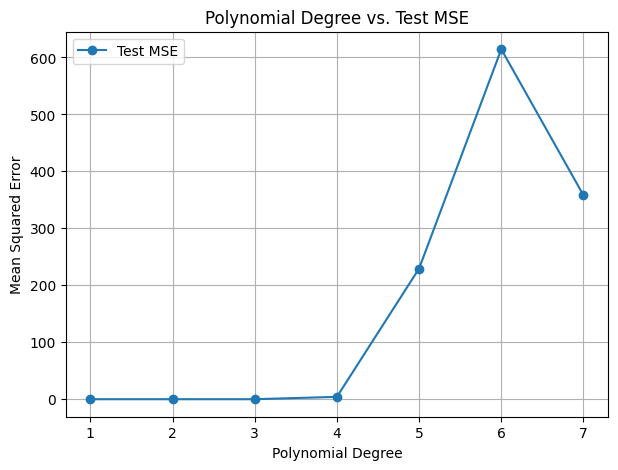

In [53]:
test_errors = []
for d in range(1, 8):
    poly = PolynomialFeatures(degree=d)
    X_poly_train = poly.fit_transform(xtrain)
    X_poly_test = poly.transform(xtest)

    model = LinearRegression()
    model.fit(X_poly_train, xtrain)

    y_test_pred = model.predict(X_poly_test)
    mse = mean_squared_error(xtest, y_test_pred)
    test_errors.append(mse)

plt.figure(figsize=(7, 5))
plt.plot(range(1, 8), test_errors, marker='o', label='Test MSE')
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Polynomial Degree vs. Test MSE")
plt.grid(True)
plt.legend()
plt.show()

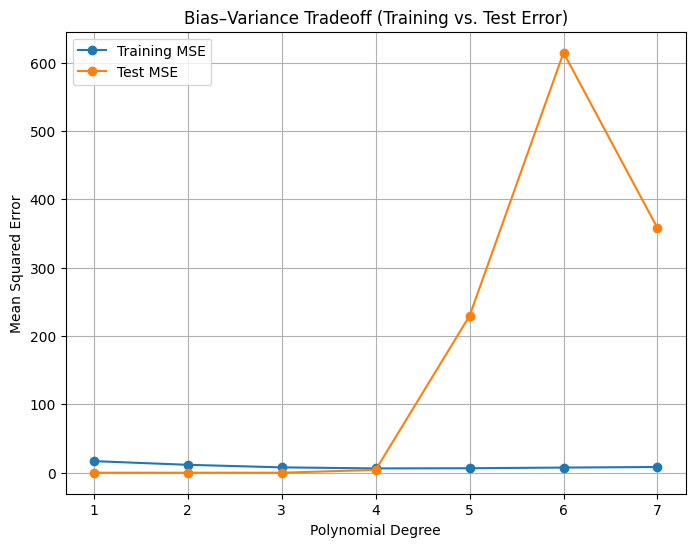

In [54]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 8), train_errors, marker='o', label='Training MSE')
plt.plot(range(1, 8), test_errors, marker='o', label='Test MSE')
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Bias–Variance Tradeoff (Training vs. Test Error)")
plt.xticks(range(1, 8))
plt.grid(True)
plt.legend()
plt.show()